### The code below contains 1. and 2.

In [182]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1,  # adds a small amount of noise
                           class_sep=1.0,  # classes are separable but not too easily
                           random_state=40)
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:


w = np.random.random((X_train.shape[1],))
b = 0
C =0.01

epochs =1000 
le = 0.00008
batch_size = 10
losses = []
N = len(X_train)
for e in range(epochs):
   delta_w, delta_b = 0,0
   points_covered = 0
   shuffled_indices = np.random.permutation(len(X_train))
   X_train_shuffled = X_train[shuffled_indices]
   y_train_shuffled = y_train[shuffled_indices]
   for x_,y_ in zip(X_train_shuffled, y_train_shuffled):
       points_covered += 1

       y_predic = np.dot(w,np.transpose(x_)) + b
       hinge_loss = np.maximum(0,1 - (y_*y_predic))

       if hinge_loss == 0:
          delta_w += w
          delta_b += 0
       else:
          delta_w += w - C*y_*x_
          delta_b += -C*y_
          
       if points_covered % batch_size == 0:
         w = (w - le * delta_w)
         b = (b - le * delta_b)
         delta_w, delta_b = 0,0

    

   shuffled_indices = np.random.permutation(len(X_test))
   X_test_shuffled = X_test[shuffled_indices]
   y_test_shuffled = y_test[shuffled_indices]

   y_predic_test = np.dot(w, np.transpose(X_test_shuffled)) + b
   y_pred_labels= np.where(y_predic_test >= 0, 1, -1)
   accuracy = accuracy_score(y_test_shuffled, y_pred_labels)

   misclassified = 1 - y_test_shuffled * y_predic_test
   misclassified[misclassified < 0] = 0
   loss = (w.dot(w) / 2) + (C * np.sum(misclassified) / N)
   losses.append(loss)
   print(f"TEST: Epoch {e+1}, Loss: {loss}",f"Accuracy: {accuracy}")

print(f"Optimal Weights are {w}")
   





TEST: Epoch 1, Loss: 0.007957538860909042 Accuracy: 0.4
TEST: Epoch 2, Loss: 0.007609892517344322 Accuracy: 0.4
TEST: Epoch 3, Loss: 0.0072841439735357155 Accuracy: 0.4
TEST: Epoch 4, Loss: 0.006978948370565686 Accuracy: 0.4
TEST: Epoch 5, Loss: 0.006693064753036164 Accuracy: 0.4
TEST: Epoch 6, Loss: 0.006425246899229241 Accuracy: 0.4
TEST: Epoch 7, Loss: 0.006174386157625178 Accuracy: 0.4
TEST: Epoch 8, Loss: 0.005939390418239664 Accuracy: 0.4
TEST: Epoch 9, Loss: 0.005719282133568028 Accuracy: 0.4
TEST: Epoch 10, Loss: 0.005513162559842343 Accuracy: 0.4
TEST: Epoch 11, Loss: 0.005320099648660307 Accuracy: 0.4
TEST: Epoch 12, Loss: 0.005139286920098523 Accuracy: 0.4
TEST: Epoch 13, Loss: 0.004969944005493553 Accuracy: 0.4
TEST: Epoch 14, Loss: 0.0048114085037411864 Accuracy: 0.4
TEST: Epoch 15, Loss: 0.004662941640273163 Accuracy: 0.41
TEST: Epoch 16, Loss: 0.004523918444564833 Accuracy: 0.42
TEST: Epoch 17, Loss: 0.0043937662855653295 Accuracy: 0.42
TEST: Epoch 18, Loss: 0.0042719351

### The code below contains 8. and 9.

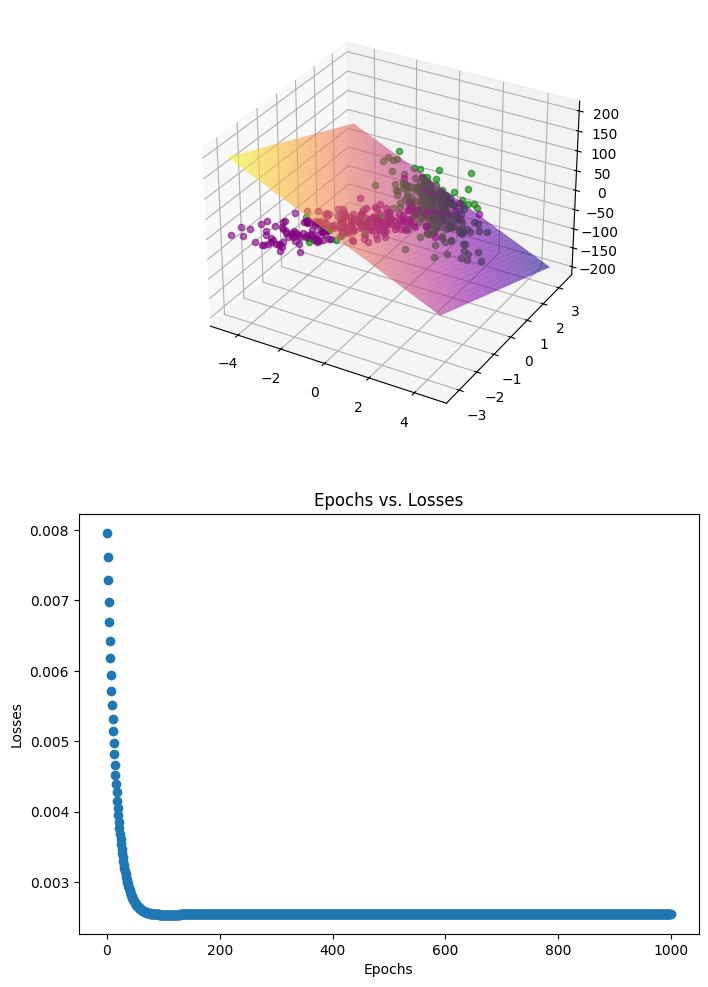

In [184]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(211, projection='3d')
for i in range(len(X)):
    if y[i] == 1:
        color = "purple"
    else:
        color = "green"
    ax.scatter(X[i,0], X[i,1], X[i,2], c=color, alpha=0.6)


x1, x2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 50), 
                    np.linspace(X[:,1].min(), X[:,1].max(),50))

x3 = (-b - w[0]*x1 - w[1]*x2)/w[2]
ax.plot_surface(x1,x2,x3, cmap = "plasma", alpha=0.6)
ax.view_init()
#
ax2 = fig.add_subplot(212)
epochs = [i for i in range(len(losses))]
ax2.scatter(x=epochs,y=losses)
ax2.set_title("Epochs vs. Losses")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Losses")
plt.show()